In [49]:
import pandas as pd
import pytz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [50]:
# Read in data
data = pd.read_csv('tweets.csv')
data['created'] = pd.to_datetime(data['created']).dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
print(data)

                                                  text                   id  \
0    b'RT @TheUndefeated: "Let\'s normalize working...  1379168310525366274   
1    b'She\xe2\x80\x99s amazing. Normalize breastfe...  1379167574215307266   
2    b'RT @TheUndefeated: "Let\'s normalize working...  1379167278680399877   
3    b'RT @TheUndefeated: "Let\'s normalize working...  1379165689265721358   
4    b'RT @TheUndefeated: "Let\'s normalize working...  1379165449447895040   
..                                                 ...                  ...   
372  b'RT @SeifertESPN: \xe2\x80\x9cLet\xe2\x80\x99...  1378853288473460738   
373  b'RT @SeifertESPN: \xe2\x80\x9cLet\xe2\x80\x99...  1378853224115998721   
374  b'RT @SeifertESPN: \xe2\x80\x9cLet\xe2\x80\x99...  1378853094130393091   
375  b'\xe2\x80\x9cLet\xe2\x80\x99s normalize worki...  1378852974911438851   
376  b'Wow, Arizona Coach Adia Barnes is still a nu...  1378852548468109314   

                      created  is_retweet  favorite

In [51]:
# Generate hourly bins
time = pd.to_datetime('2021-04-04 16:00:00-07:00')
bins = []
while time <= pd.to_datetime('2021-04-05 12:00:00-07:00'):
    bins.append(time)
    time = time + np.timedelta64(1, 'h')
print(len(bins))

21


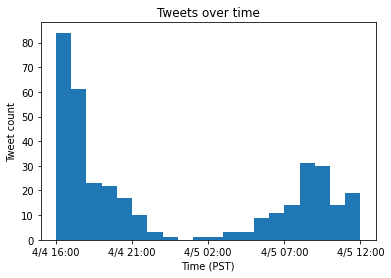

In [52]:
# Plot histogram of Tweets
fig, ax = plt.subplots()
counts,bins, patches = plt.hist(x=data['created'], bins=bins)
plt.title('Tweets over time')
plt.xlabel('Time (PST)')
plt.ylabel('Tweet count')
ax.set_xticks([bins[0], bins[5], bins[10], bins[15], bins[20]])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d %H:%M', tz=pytz.timezone('US/Pacific')))
plt.savefig('tweets_over_time.png')

In [54]:
# Find the most liked tweets
data[data['is_retweet']==False].sort_values('favorites', ascending=False).head(5)

,text,id,created,is_retweet,favorites,retweets
352,"b'""Let\'s normalize working mothers and all th...",1378857455283802115,2021-04-04 16:50:09-07:00,False,1268,326
128,"b'Last night, Holly Rowe highlighted that Ariz...",1379071211674730500,2021-04-05 06:59:33-07:00,False,221,28
375,b'\xe2\x80\x9cLet\xe2\x80\x99s normalize worki...,1378852974911438851,2021-04-04 16:32:21-07:00,False,176,35
376,"b'Wow, Arizona Coach Adia Barnes is still a nu...",1378852548468109314,2021-04-04 16:30:40-07:00,False,154,13
209,b'It\xe2\x80\x99s Stanford women for the win!\...,1378888028446289920,2021-04-04 18:51:39-07:00,False,61,3


In [55]:
# Find the most retweeted tweets
data[data['is_retweet']==False].sort_values('retweets', ascending=False).head(5)

,text,id,created,is_retweet,favorites,retweets
352,"b'""Let\'s normalize working mothers and all th...",1378857455283802115,2021-04-04 16:50:09-07:00,False,1268,326
375,b'\xe2\x80\x9cLet\xe2\x80\x99s normalize worki...,1378852974911438851,2021-04-04 16:32:21-07:00,False,176,35
128,"b'Last night, Holly Rowe highlighted that Ariz...",1379071211674730500,2021-04-05 06:59:33-07:00,False,221,28
376,"b'Wow, Arizona Coach Adia Barnes is still a nu...",1378852548468109314,2021-04-04 16:30:40-07:00,False,154,13
209,b'It\xe2\x80\x99s Stanford women for the win!\...,1378888028446289920,2021-04-04 18:51:39-07:00,False,61,3


In [59]:
# Read in sentiment data
sentiment = pd.read_csv('sentiment.csv')
print(sentiment)

                     id  score  magnitude
0   1379167574215307266    0.5        1.5
1   1379133564432871424   -0.6        0.6
2   1379117725633679366   -0.6        0.6
3   1379116563807268864    0.1        0.1
4   1379071211674730500   -0.4        0.4
5   1379068102122561537    0.4        0.4
6   1379064406047350784    0.2        0.5
7   1378914666794074112    0.3        0.7
8   1378914012109418497   -0.1        0.8
9   1378888028446289920    0.1        0.1
10  1378887258577661953    0.2        0.2
11  1378858408154136576    0.0        0.5
12  1378857702064001027   -0.1        0.1
13  1378857455283802115   -0.2        0.4
14  1378855977299157002    0.0        0.0
15  1378854177896505344    0.3        1.1
16  1378854022921207811   -0.5        0.5
17  1378853618720272384    0.5        0.5
18  1378852974911438851   -0.2        0.2
19  1378852548468109314    0.1        1.3


(array([3., 1., 4., 5., 4., 3.]),
 array([-0.60000002, -0.41666669, -0.23333335, -0.05000001,  0.13333333,
         0.31666666,  0.5       ]),
 <BarContainer object of 6 artists>)

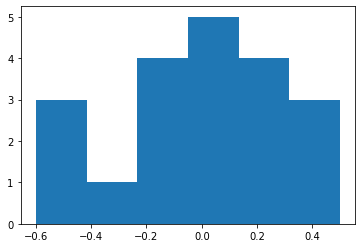

In [60]:
plt.hist(x=sentiment['score'], bins='auto')